In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data3/train.csv')
test = pd.read_csv('data3/test.csv')
submission = pd.read_csv('data3/gender_submission.csv')

In [3]:
train.info()
# 결측치 확인 (Age,Cabin,Embarked)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
#최빈값으로 Embarked를 채워준다 (S)
train.Embarked = train.Embarked.fillna('S')
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# Age 같은 경우는 중간값으로 채워주기로 결정
train.Age.median()
#median 값이 28
train.Age = train.Age.fillna(28)
train.isna().sum()
# Cabin은 결측치가 너무 많아서 제외하기로 결정

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

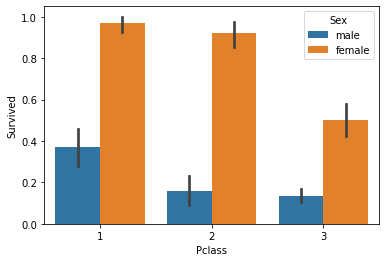

In [8]:
#데이터 시각화 예시 코드...
sns.barplot(x='Pclass',y='Survived', hue = 'Sex', data=train)

In [9]:
train.Sex = train.Sex.map({'male':0,'female':1})
test.Sex = test.Sex.map({'male':0,'female':1})
# 범주형 데이터로 이루어진 경우 모델링 할 때 오류가 날 수 있어서 값을 변환해줌

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [11]:
train.Age = train.Age.astype(int)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.2+ KB


In [13]:
#LogisticRegression 할때 float 형도 안되는듯? Input contains NaN, infinity or a value too large for dtype('float64').
lr = LogisticRegression()
X_train = train[['Sex','Pclass','Age','SibSp','Parch']]
y_train = train['Survived']
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
X_test = test[['Sex','Pclass','Age','SibSp','Parch']]

In [15]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [16]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
test.Age.median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>

In [18]:
test.Age.median()

27.0

In [19]:
test.Age = test.Age.fillna(27)

In [20]:
test.Age = test.Age.astype(int)

In [21]:
X_test = test[['Sex','Pclass','Age','SibSp','Parch']]

In [22]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [23]:
lr.predict_proba(X_test)
#확률 값으로 표현해준 것

array([[0.914002  , 0.085998  ],
       [0.63007954, 0.36992046],
       [0.90956648, 0.09043352],
       [0.89005678, 0.10994322],
       [0.40737721, 0.59262279],
       [0.83002863, 0.16997137],
       [0.3898373 , 0.6101627 ],
       [0.78461751, 0.21538249],
       [0.28605879, 0.71394121],
       [0.92393635, 0.07606365],
       [0.89005678, 0.10994322],
       [0.63234841, 0.36765159],
       [0.06365733, 0.93634267],
       [0.93503678, 0.06496322],
       [0.14738588, 0.85261412],
       [0.18158024, 0.81841976],
       [0.77876557, 0.22123443],
       [0.86506573, 0.13493427],
       [0.43902489, 0.56097511],
       [0.53376421, 0.46623579],
       [0.7706151 , 0.2293849 ],
       [0.81094038, 0.18905962],
       [0.05455435, 0.94544565],
       [0.40973239, 0.59026761],
       [0.17913713, 0.82086287],
       [0.96460605, 0.03539395],
       [0.0482385 , 0.9517615 ],
       [0.86954045, 0.13045955],
       [0.58610465, 0.41389535],
       [0.93879546, 0.06120454],
       [0.

In [24]:
lr.predict_proba(X_test)[:,1]
lr_pred = lr.predict_proba(X_test)[:,1]

In [25]:
submission.Survived = lr_pred
submission

,PassengerId,Survived
0,892,0.085998
1,893,0.369920
2,894,0.090434
3,895,0.109943
4,896,0.592623
...,...,...
413,1305,0.109943
414,1306,0.915742
415,1307,0.074534
416,1308,0.109943


In [26]:
submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.398123
std,120.810458,0.297019
min,892.000000,0.013769
25%,996.250000,0.113806
50%,1100.500000,0.299406
75%,1204.750000,0.646207
max,1309.000000,0.956302


In [27]:
submission.to_csv('Logistic_regression_pred1.csv',index = False)

In [30]:
pred1 = lr.predict(X_test)
#Kaggle에 제출할 때에는 0과 1로만 표시해야함

In [32]:
submission.Survived = pred1

In [33]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
submission.to_csv('Logistic_regression_pred2.csv',index = False)